In [ ]:
# Generates 2D and 3D mesh from a function or topography from a file/function
# Organic layering have constant thickness
%matplotlib

In [1]:
import sys, os

#sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing_ats'))
sys.path.append('/Users/ajc/Core/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats')
import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import scipy.signal
import math

In [2]:
print(meshing_ats.__file__)

/Users/ajc/Core/codes/simulator/debug/ats-mesh/tools/meshing_ats/meshing_ats/meshing_ats.py


In [3]:
topography_from_Excel = False
topography_from_function1D = False
topography_from_function2D = False
topography_from_function1D_Tidal = True

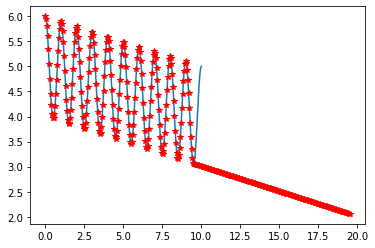

In [4]:
# Plot the topography here so make sure data is read correctly
# if topography is provided through Excel sheet
if (topography_from_Excel):
    xl =pd.ExcelFile('Topo_Profiles_Barrow.xlsx')
    xl.sheet_names
    data = xl.parse(sheet_name='Transect B, Area C')
    keys = data.keys()
    plt.plot(data['Distance_m'], data['Z'])
    plt.ylabel('Elevation')
    plt.title('Topography, Polygon Area C')
    plt.xlabel('Distance [m] (trough-to-trough)')
    plt.show()
    
# To get topography from a 1D function, define it here, e.g., z = sine(x)
if(topography_from_function1D):
    A = 0.15
    k1 = math.pi - 100
    m = .01
    Xf_1d = np.linspace(0,100,101)
    Zf_1d = A*np.sin(k1*Xf_1d) + m*Xf_1d
    plt.plot(Xf_1d,Zf_1d)
    
# To get topography from a 2D function, define it here, e.g., z = sine(x,y)
if(topography_from_function2D):
    A = 0.15
    k1 = math.pi
    k2 = math.pi
    m = 0.1
    Xf_2d = np.linspace(0,2,101)
    Yf_2d = np.linspace(0,2,101)
    [Xf,Yf] = np.meshgrid(Xf_2d,Yf_2d)

    Zf_2d = A*np.sin(k1*Xf)*np.sin(k2*Yf) + m*Xf

    plt.contourf(Xf,Yf,Zf_2d)
    
# To get topography from a 1D function, define it here, e.g., z = sine(x)
if(topography_from_function1D_Tidal):
    A = 0.5
    k1 = math.pi - 100
    m = .1
    L = 10
    Xf_1d = np.linspace(0,L,L+200)
    #Zf_1d = A*np.sin(k1*Xf_1d) #+ m*Xf_1d
    #Zf_1d = np.sin(2*np.pi*5*Xf_1d/L)
    #plt.plot(Xf_1d,Zf_1d)
    lambda1 = 1
    omega =10* np.pi
    phi = 0
    A = 1
    Zf_1d = 1 + np.exp(-Xf_1d) * np.cos(2 *np.pi * Xf_1d)
    #m = 
    Zf_1d = 5 + np.cos(2 *np.pi * Xf_1d) - m*Xf_1d
    plt.plot(Xf_1d,Zf_1d)
    L = 10
    Xf_1d_1 = np.linspace(Xf_1d[-11],Xf_1d[-11]+L,L+200)
    Zf_1d_1 = Zf_1d[-11]-0.1*Xf_1d
    
    #plt.plot(Xf_1d_1,Zf_1d_1)
    Zf_1d_2 = np.concatenate((Zf_1d[:-10], Zf_1d_1))
    Xf_1d_2 = np.concatenate((Xf_1d[:-10], Xf_1d_1))
    plt.plot(Xf_1d_2,Zf_1d_2,'r*')
    Zf_1d = Zf_1d_2
    Xf_1d = Xf_1d_2
    

In [5]:
# smooth the topographic data'

def surface1D_topography():
    assert topography_from_Excel or topography_from_function1D or topography_from_function1D_Tidal
    global x 
    global z 
    global z_smooth
    x_index = []
    if topography_from_Excel:
        x = np.array(data['Distance_m'])
        z = np.array(data['Z'])
        x_index = [0, 10, 25, len(x)-30] # indices for smoothing interval
        l = x_index[3]
        #print l
    elif (topography_from_function1D):
        x = Xf_1d
        z = Zf_1d
        x_index = [0, 9, 26, len(x)-1] # indices for smoothing interval
    elif (topography_from_function1D_Tidal):
        x = Xf_1d
        z = Zf_1d
        #x_index = [0, 9, 26, len(x)-1] # indices for smoothing interval
    
    smoothed= True
    if(topography_from_function1D_Tidal):
        smoothed= False
        l = -1
    z_smooth = z
    if (smoothed):
        x1 = [x[x_index[0]], x[x_index[1]]]
        z1 = [z[x_index[0]], z[x_index[1]]]

        x2 = [x[x_index[1]], x[x_index[2]], x[x_index[3]]]
        z2 = [z[x_index[1]], z[x_index[2]], z[x_index[3]]]

        cs1 = scipy.interpolate.CubicSpline(x1,z1, bc_type='clamped')
        cs2 = scipy.interpolate.CubicSpline(x2,z2, bc_type='clamped')


        z_smooth = np.concatenate((cs1(x[:11]), cs2(x[11:l])))

    z_smooth = np.array([round(s,4) for s in z_smooth])
    x = x
    plt.plot(x, z_smooth, '-.', color = 'k')
    #plt.plot(x1,z1,'*', color='c')
    #plt.plot(x2,z2,'*', color='c')

    plt.ylabel('Elevation [m]')
    plt.xlabel('Distance [m]')
    plt.title('Mesh, Polygon Area C')
    plt.show()


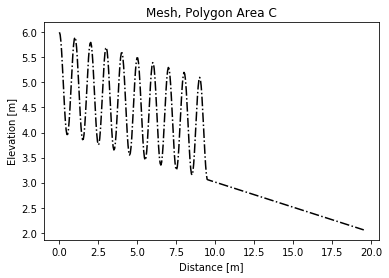

In [6]:
surface1D_topography()

In [7]:
print (x)
print (z_smooth)

[ 0.          0.04784689  0.09569378  0.14354067  0.19138756  0.23923445
  0.28708134  0.33492823  0.38277512  0.43062201  0.4784689   0.52631579
  0.57416268  0.62200957  0.66985646  0.71770335  0.76555024  0.81339713
  0.86124402  0.90909091  0.9569378   1.00478469  1.05263158  1.10047847
  1.14832536  1.19617225  1.24401914  1.29186603  1.33971292  1.38755981
  1.4354067   1.48325359  1.53110048  1.57894737  1.62679426  1.67464115
  1.72248804  1.77033493  1.81818182  1.86602871  1.9138756   1.96172249
  2.00956938  2.05741627  2.10526316  2.15311005  2.20095694  2.24880383
  2.29665072  2.34449761  2.3923445   2.44019139  2.48803828  2.53588517
  2.58373206  2.63157895  2.67942584  2.72727273  2.77511962  2.82296651
  2.8708134   2.91866029  2.96650718  3.01435407  3.06220096  3.11004785
  3.15789474  3.20574163  3.25358852  3.30143541  3.3492823   3.39712919
  3.44497608  3.49282297  3.54066986  3.58851675  3.63636364  3.68421053
  3.73205742  3.77990431  3.8277512   3.87559809  3

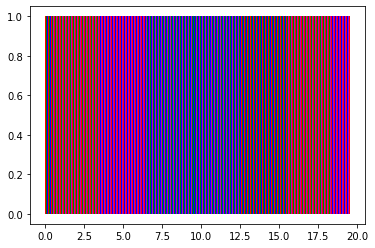

In [8]:
#reload(meshing_ats)
if (topography_from_function1D or topography_from_Excel or topography_from_function1D_Tidal):
    m2 = meshing_ats.Mesh2D.from_Transect(x,z_smooth)
elif(topography_from_function2D):
    m2 = meshing_ats.Mesh2D.from_2DSurface(Xf_2d,Yf_2d,Zf_2d) #1D x, 1D y, and 2D Z
m2.plot()


In [11]:
outfile = "/Users/ajc/Desktop/ATS/meshes/barrow-pie-wedges/"
layer_types = []
layer_data = []
layer_ncells = []
layer_mat_ids = []

z=0
Z = []

for i in range(1):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1001)
    z = z + 0.02
    Z.append(z)
print ('Moss ', z)

for i in range(4):
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1002)
    z = z + 0.02
    Z.append(z)
print ('Peat ', z)

for i in range(15): 
    layer_types.append('constant')
    layer_data.append(0.02)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + 0.02
    Z.append(z)
print ('Upper mineral ', z)

dz = .02
for i in range(35):
    dz *= 1.075
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print ('Ice rich', z)

for i in range(25):
    dz *= 1.12
    layer_types.append("constant")
    layer_data.append(dz)
    layer_ncells.append(1)
    layer_mat_ids.append(1003)
    z = z + dz
    Z.append(z)
print (z)


layer_types.append('snapped')
layer_data.append(-45.0) # bottom location
layer_ncells.append(1)
layer_mat_ids.append(1003)

m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                        layer_data, 
                                        layer_ncells, 
                                        layer_mat_ids)

file= "topo_tidal_5layers.exo"
m3.write_exodus(file.encode('utf8'))
#m3.write_exodus( u"topo_tidal_5layers.exo")


Moss  0.02
Peat  0.1
Upper mineral  0.4000000000000001
Ice rich 3.716409519999923
41.2555869470643

You are using exodus.py v 1.19.1 (seacas-py3), a python wrapper of some of the exodus library.

Copyright (c) 2013, 2014, 2015, 2016, 2017, 2018, 2019 National Technology &
Engineering Solutions of Sandia, LLC (NTESS).  Under the terms of
Contract DE-NA0003525 with NTESS, the U.S. Government retains certain
rights in this software.

Opening exodus file: topo_tidal_5layers.exo
Closing exodus file: topo_tidal_5layers.exo
